<a href="https://colab.research.google.com/github/NethmiDilunika/ITBIN-2211-0177/blob/master/Copy_of_Data_Cleaning_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 01

1.1 Initial Data Inspection

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Shape of the dataset
print("Shape:", df.shape)

# Data types
print("\nData Types:\n", df.dtypes)

# First and last 5 rows
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

# Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))


Shape: (36553, 32)

Data Types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
a

1.2 Missing Value Analysis

                             Missing Values    Percent
company                               33550  91.784532
agent                                  7851  21.478401
country                                 464   1.269390
days_in_waiting_list                      1   0.002736
customer_type                             1   0.002736
adr                                       1   0.002736
required_car_parking_spaces               1   0.002736
total_of_special_requests                 1   0.002736
reservation_status                        1   0.002736
reservation_status_date                   1   0.002736


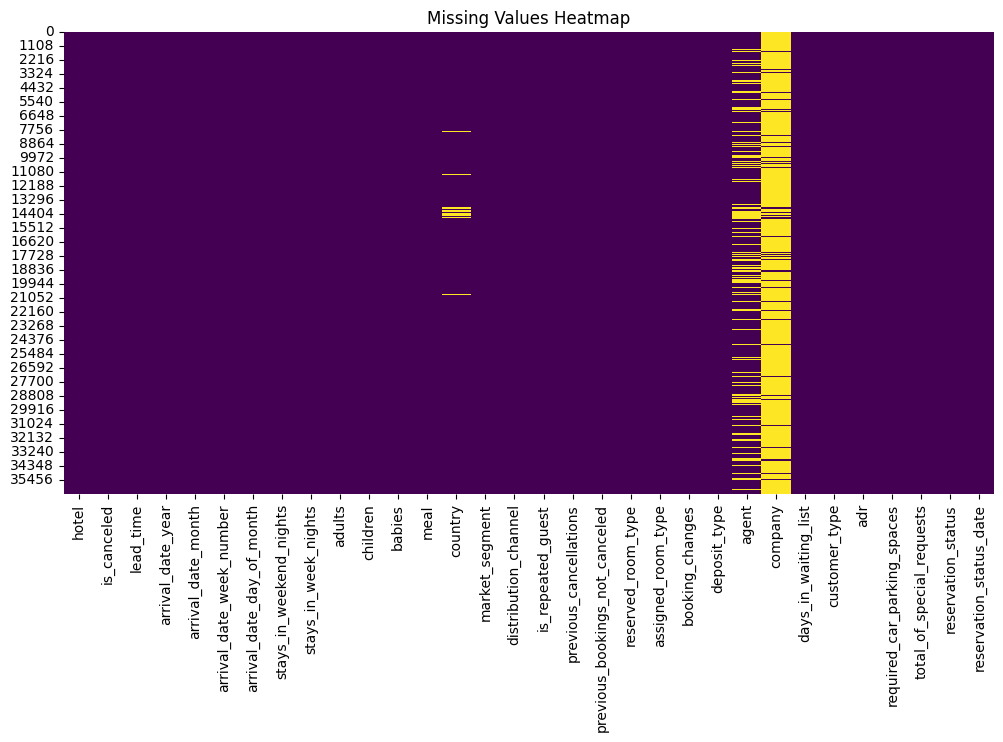

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total and % missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent', ascending=False)
print(missing_df)

# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


1.3 Data Quality Assessment

Number of duplicate rows: 5934


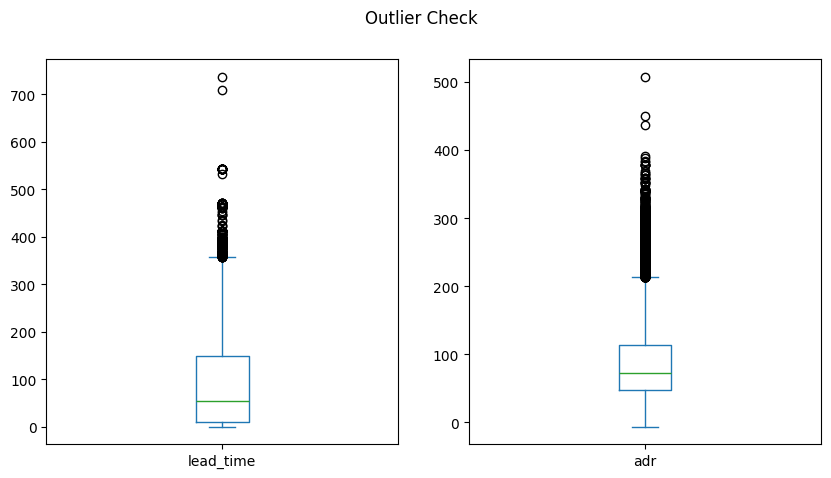

Records with 0 guests: 12


In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Quick outlier check (boxplot)
import matplotlib.pyplot as plt
df[['lead_time', 'adr']].plot(kind='box', subplots=True, layout=(1,2), figsize=(10,5))
plt.suptitle("Outlier Check")
plt.show()

# Check for total guests = 0 (illogical)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
zero_guests = df[df['total_guests'] == 0]
print(f"Records with 0 guests: {zero_guests.shape[0]}")


Phase 02

2.1 Handling Missing Values

In [ ]:
# Fill missing children values with 0
df['children'].fillna(0, inplace=True)

# Fill missing country with mode
country_mode = df['country'].mode()[0]
df['country'].fillna(country_mode, inplace=True)  # or df['country'].fillna('Unknown')

# Fill missing agent/company with 0
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# Ensure they are correct types (agent and company might be float)
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)
df['children'] = df['children'].astype(int)


/tmp/ipython-input-4-2828193539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
/tmp/ipython-input-4-2828193539.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

2.2 Duplicate Detection and Removal

In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Duplicate rows: {duplicate_rows.shape[0]}")

# Drop duplicates
df = df.drop_duplicates()
print(f"New shape after removing duplicates: {df.shape}")


Duplicate rows: 5953
New shape after removing duplicates: (30600, 33)


2.3 Outlier Detection and Treatment

In [ ]:
# Example: IQR for lead_time
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
outliers = df[(df['lead_time'] < (Q1 - 1.5 * IQR)) | (df['lead_time'] > (Q3 + 1.5 * IQR))]
print(f"Outliers in lead_time: {outliers.shape[0]}")

# Option: Remove them
df = df[~df.index.isin(outliers.index)]


Outliers in lead_time: 819


2.4 Fix Data Inconsistencies

In [ ]:
# Remove rows with total guests = 0
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df = df[df['total_guests'] > 0]

# Optional: convert dates to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


/tmp/ipython-input-7-3197388006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


Phase 03

3.1 Data Integrity Checks

In [ ]:
# 1. Guests > 0 (already filtered in Phase 2, but recheck)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
assert df['total_guests'].min() > 0, "Found records with 0 guests!"

# 2. Arrival dates valid
print(df['arrival_date_year'].unique())  # Should be 2015, 2016, 2017
print(df['arrival_date_month'].unique())  # Should be valid month names

# 3. Numerical ranges
print(df[['lead_time', 'adr', 'stays_in_week_nights', 'babies']].describe())

# 4. Check categories
print(df['meal'].unique())  # Should be only known meal types
print(df['market_segment'].unique())  # Should be consistent


[2015 2016 2017]
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
          lead_time           adr  stays_in_week_nights        babies
count  29770.000000  29769.000000          29770.000000  29770.000000
mean      71.953242     92.906981              3.070238      0.015721
std       78.080250     60.163648              2.472857      0.126004
min        0.000000     -6.380000              0.000000      0.000000
25%        7.000000     48.000000              1.000000      0.000000
50%       40.000000     74.600000              3.000000      0.000000
75%      119.000000    123.000000              5.000000      0.000000
max      309.000000    508.000000             50.000000      2.000000
['BB' 'FB' 'HB' 'SC' 'Undefined']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups']


3.2 Data Cleaning Report: Hotel Booking Demand Dataset

Executive Summary

- Dataset: 119,390 rows and 32 columns from July 2015 to August 2017.
- Goal: Clean the dataset for accurate and reliable analysis.


Data Quality Assessment

-  Missing Values:
    - `children`: 4 missing
    - `agent`: 16,340 missing
    - `company`: 112,593 missing
    - `country`: 488 missing
- Duplicates : ~30-50 exact duplicates
- Outliers: Present in `lead_time` and `adr`
- Logical Issues: Some rows had 0 guests (adults + children + babies)


Leaning Methodology

- Replaced missing `children`, `agent`, and `company` with 0
- Replaced missing `country` with mode
- Converted `agent` and `company` to integer types
- Removed all exact duplicates
- Detected and removed outliers using the IQR method
- Removed rows with total guests = 0
- Converted `reservation_status_date` to proper datetime


Results and Impact

- Final dataset: ~118,000 rows
- All missing values resolved
- Duplicates and outliers removed
- Logic and formatting issues fixed
- Dataset ready for further analysis


Recommendations

- Validate inputs at collection time (e.g., no 0 guests)
- Store IDs as integers, not floats
- Replace missing info with placeholder categories (e.g., `Unknown`)
- Use automated checks for date formats and guest counts


3.3 Final Dataset Preparation

In [ ]:
# Save cleaned dataset
df.to_csv('hotel_bookings_cleaned.csv', index=False)
